# Context of Data 
  Company - UK-based and registered non-store online retail 
  
  Products for selling - Mainly all-occasion gifts 
  
  Customers - Most are wholesalers (local or international) 
  
  Transactions Period - 1st Dec 2010 - 9th Dec 2011 (One year)

In [1]:
# importing some necessary libraries upfront.
import datetime as dt
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Ecommerce - UK Retailer.csv')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## 1. Perform Basic EDA

In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Some columns require data type conversions.Let's do that.

In [6]:
# converting the InvoiceDate field to datetime format.

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

There are certain number of Null values in the 'Description' and 'CustomerID' fields that has to be taken care of.

#### a] Boxplot – All Numeric Variables

After the data type conversions Quantity,UnitPrice and CustomerID are the numeric variables we have.

Text(0.5, 1.0, 'Unit Price Distribution')

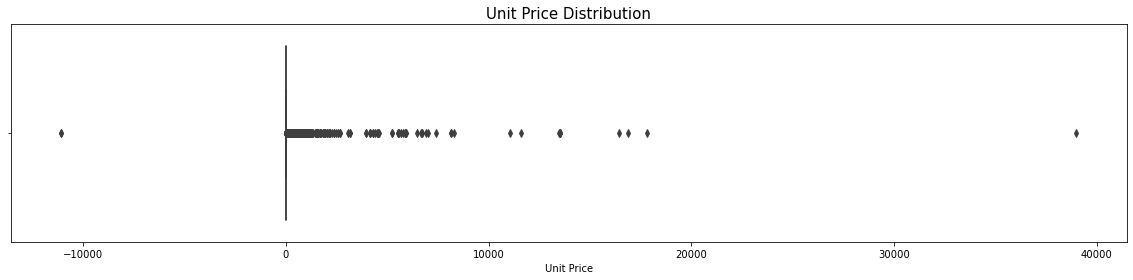

In [9]:
plt.subplots(figsize=(20,4))
sns.boxplot(df.UnitPrice)

plt.xlabel('Unit Price')
plt.title('Unit Price Distribution',fontsize=15)


There are some outliers present in the data.

Text(0.5, 1.0, 'Quantity Distribution')

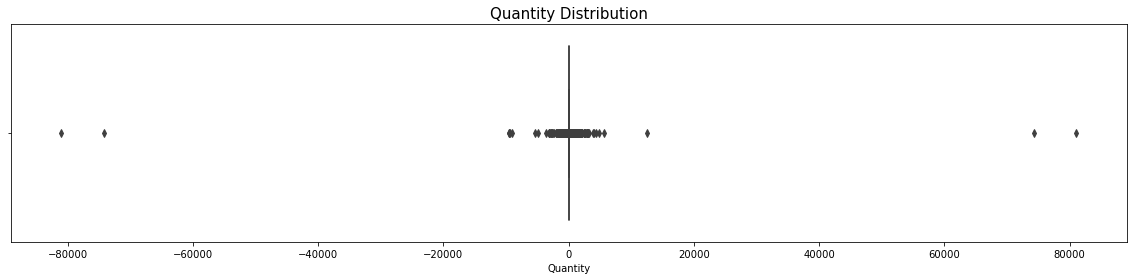

In [10]:
plt.subplots(figsize=(20,4))
sns.boxplot(df.Quantity)

plt.xlabel('Quantity')
plt.title('Quantity Distribution',fontsize=15)


There are negative values present in Quantity that doesn't make any sense.

Text(0.5, 1.0, 'Cust ID Distribution')

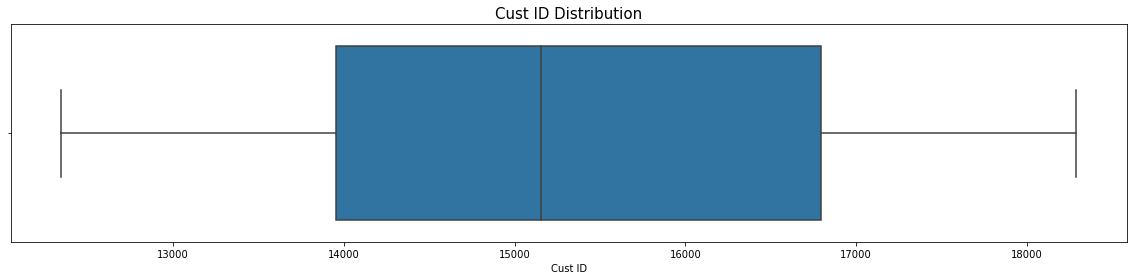

In [11]:
plt.subplots(figsize=(20,4))
sns.boxplot(df.CustomerID)

plt.xlabel('Cust ID')
plt.title('Cust ID Distribution',fontsize=15)


Customer ID is not something with which we do analysis.So there's nothing much to infer from this boxplot.

#### b] Histogram – All Numeric Variables 

Text(0.5, 1.0, 'Cust ID Distribution')

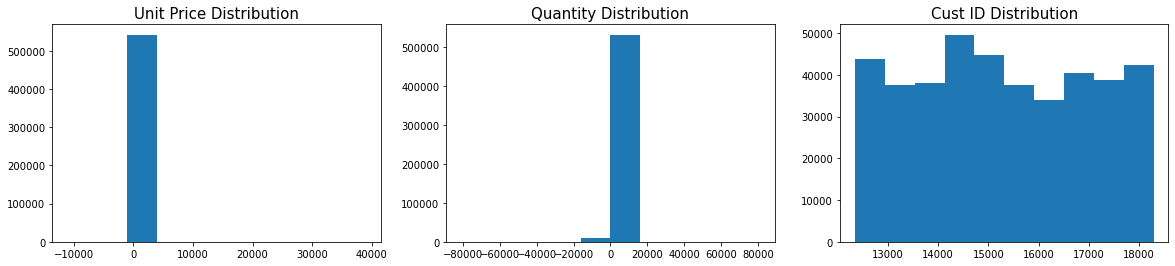

In [12]:
plt.subplots(figsize=(20,4))

# Histogram for UnitPrice

plt.subplot(1,3,1)
plt.hist(df["UnitPrice"])
plt.title('Unit Price Distribution',fontsize=15)

# Histogram for Quantity

plt.subplot(1,3,2)
plt.hist(df["Quantity"])
plt.title('Quantity Distribution',fontsize=15)

# Histogram for CustomerID

plt.subplot(1,3,3)
plt.hist(df["CustomerID"])
plt.title('Cust ID Distribution',fontsize=15)


From these histograms we can see, to which range our data is concentrated.

#### c] Distribution Plot – All Numeric Variables

Text(0.5, 1.0, 'Cust ID Distribution')

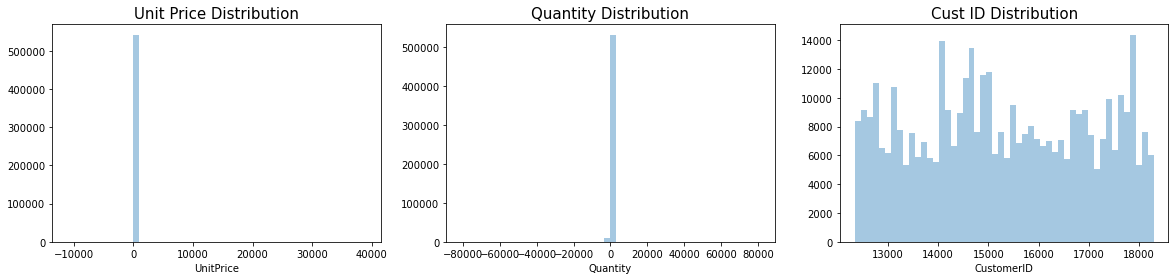

In [13]:
plt.subplots(figsize=(20,4))

# Distribution plot for UnitPrice

plt.subplot(1,3,1)
sns.distplot(df.UnitPrice, kde=False)
plt.title('Unit Price Distribution',fontsize=15)

# Distribution plot for Quantity

plt.subplot(1,3,2)
sns.distplot(df.Quantity, kde=False)
plt.title('Quantity Distribution',fontsize=15)

# Distribution plot for CustomerID

plt.subplot(1,3,3)
sns.distplot(df.CustomerID, kde=False)
plt.title('Cust ID Distribution',fontsize=15)

From these distribution plots we can see,how our data is distributed in the available range.

#### d] Aggregation for all numerical Columns

We have only three numerical coumns to aggregate.

In [14]:
num_col=df[["UnitPrice","Quantity","CustomerID"]]

In [15]:
num_col.head()

,UnitPrice,Quantity,CustomerID
0,2.55,6,17850.0
1,3.39,6,17850.0
2,2.75,8,17850.0
3,3.39,6,17850.0
4,3.39,6,17850.0


'num_col' gives the aggregate table for numerical values.

In [16]:
num_col.describe()

,UnitPrice,Quantity,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,4.611114,9.552250,15287.690570
std,96.759853,218.081158,1713.600303
min,-11062.060000,-80995.000000,12346.000000
25%,1.250000,1.000000,13953.000000
50%,2.080000,3.000000,15152.000000
75%,4.130000,10.000000,16791.000000
max,38970.000000,80995.000000,18287.000000


The above table gives a rough idea about various statistical parameters of our data.

#### e] Unique Values across all columns

In [17]:
for col in df:
    print("\033[1m",col,"\033[0m"," :\n",df[col].unique())

 InvoiceNo   :
 ['536365' '536366' '536367' ... '581585' '581586' '581587']
 StockCode   :
 ['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']
 Description   :
 ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
 Quantity   :
 [     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144    160   2880   1400     39    -48    -50     26   1440
    

It's meaningless to look for unique values in numerical columns.So let's consider only the categorical columns' unique values.

In [18]:
cat_col=['InvoiceNo','StockCode','Description','InvoiceDate','Country']

for col in cat_col:
    print("\033[1m",col,"\033[0m"," :\n",df[col].unique(),"\n")

 InvoiceNo   :
 ['536365' '536366' '536367' ... '581585' '581586' '581587'] 

 StockCode   :
 ['85123A' '71053' '84406B' ... '90214U' '47591b' '23843'] 

 Description   :
 ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE'] 

 InvoiceDate   :
 ['2010-12-01T08:26:00.000000000' '2010-12-01T08:28:00.000000000'
 '2010-12-01T08:34:00.000000000' ... '2011-12-09T12:31:00.000000000'
 '2011-12-09T12:49:00.000000000' '2011-12-09T12:50:00.000000000'] 

 Country   :
 ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' '

In [19]:
#let's look for no.of unique values in each column.

df.nunique(axis=0)

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

The above data shows the no.of unique values available in each columns.From that we get the idea that we are dealing with the data of 4372 customers from 32 different countries.

#### f] Duplicate values across all columns

In [20]:
# plot the table with only duplicate values

df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


The table above gives the duplicate values in our dataset.

In [21]:
# no.of duplicate values in each column.

df[df.duplicated()].count()

InvoiceNo      5268
StockCode      5268
Description    5268
Quantity       5268
InvoiceDate    5268
UnitPrice      5268
CustomerID     5225
Country        5268
dtype: int64

The above information clearly gives us the no.of duplicate values available in every column. It is not good to keep them as such, as it is going to reduce the accuracy of our analysis.

#### g] Correlation – Heatmap - All Numeric Variables

<AxesSubplot:>

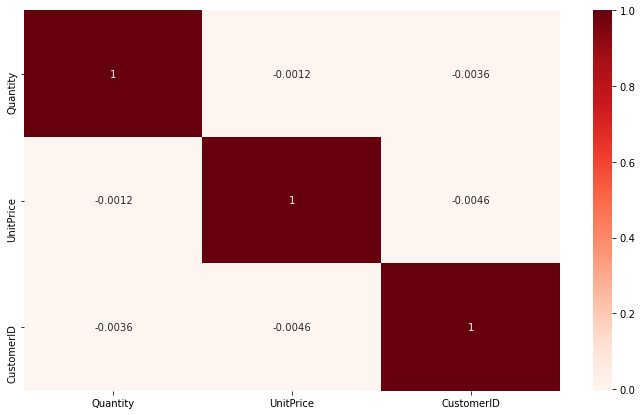

In [22]:
plt.figure(figsize=(12,7))

# Heatmap shwoing correlation between all numeric variables.

sns.heatmap(df.corr(), cmap="Reds", annot=True)

Almost all of the variables have a correlation close to zero.So there is no significant correlation between these numerical fields.

#### h] Regression Plot - All Numeric Variables

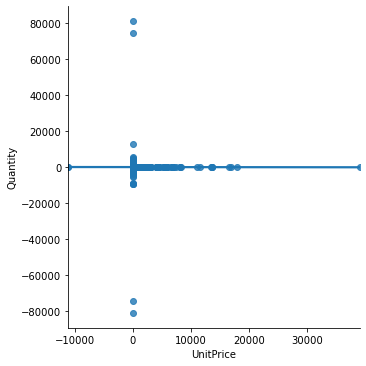

In [23]:
# regression plot between price and quantity

sns.lmplot('UnitPrice','Quantity',data=df)

There is no evident relationship among unit price and quanity.

#### i] Bar Plot – Every Categorical Variable vs every Numerical Variable

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


It's not meaningful to compare every categorical and numerical variables.

Text(0.5, 1.0, 'Countrywise Quantity of Items')

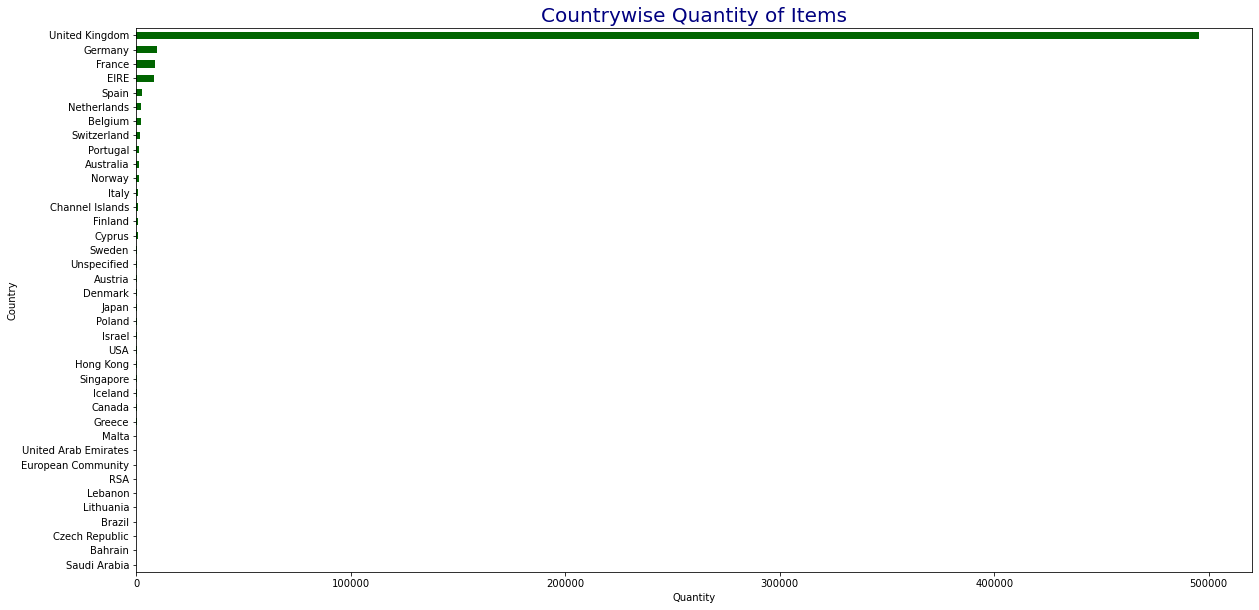

In [25]:
# Let's compare the no.of qunatity of orders delivered to different countries.

Countrywise_quantity=df.groupby('Country')['Quantity'].count().sort_values()

plt.subplots(figsize=(20,10))
Countrywise_quantity.plot(kind='barh',color='darkgreen', fontsize=10)
plt.xlabel('Quantity')

plt.title('Countrywise Quantity of Items',fontsize=20,color='navy')


The above graph gives an idea about the quantity of items purchased by different countries.

We will go a deep into this later in our analysis.Let's now do what we are asked to do.

Text(0.5, 1.0, 'Countrywise Mean Unit Price')

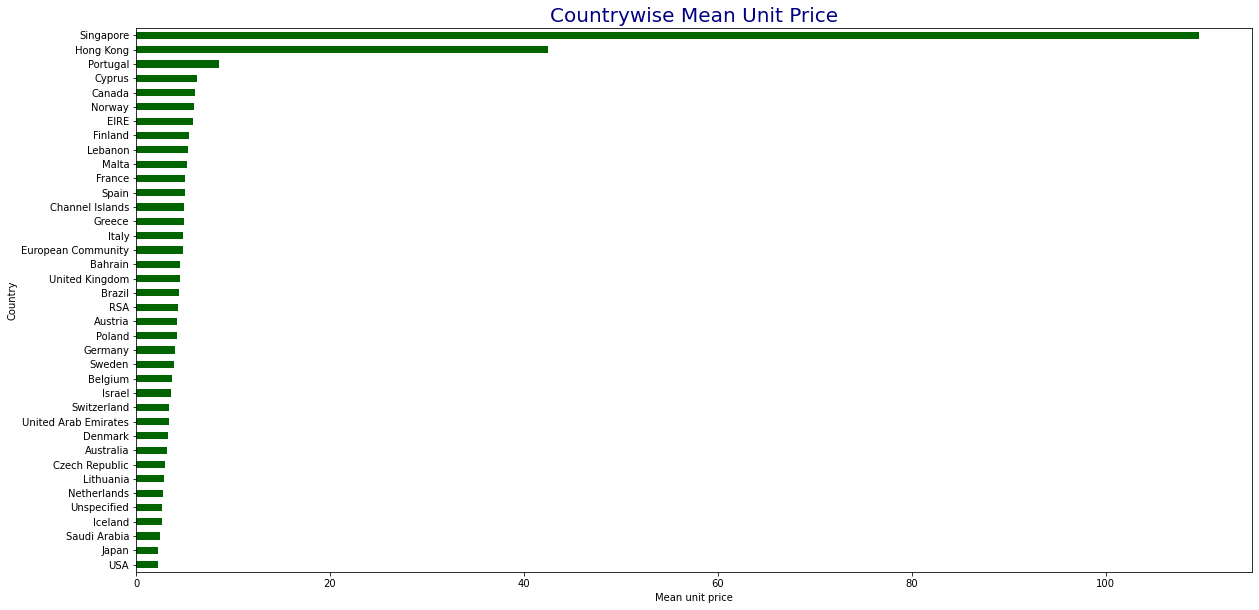

In [26]:
# Let's look for the mean price at which products are sold at different countries.

mean_price=df.groupby('Country')['UnitPrice'].mean().sort_values()

plt.subplots(figsize=(20,10))
mean_price.plot(kind='barh',color='darkgreen', fontsize=10)
plt.xlabel('Mean unit price')

plt.title('Countrywise Mean Unit Price',fontsize=20,color='navy')


We can see that the mean unit price is high for countries like Singapore and Hongkong.

#### j] Pair plot - All Numeric Variables 

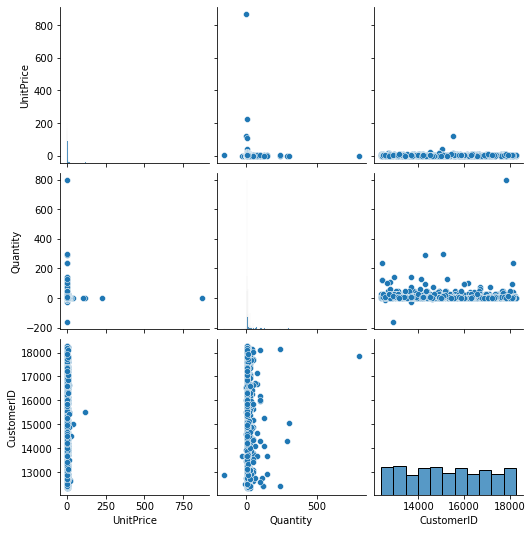

In [27]:
sns.pairplot(df.sample(1000),vars=['UnitPrice','Quantity', 'CustomerID'])

I think there is a relationship between Quantity and Unit Price.For lower order quantities the unit price varies in a wide range.But for Higher quantities the unit price is consistently low.

#### k] Line chart to show the trend of data - All Numeric/Date Variables 

Let's look how the unit price varies over time.

<AxesSubplot:title={'center':'Change of Price over time '}, xlabel='InvoiceDate'>

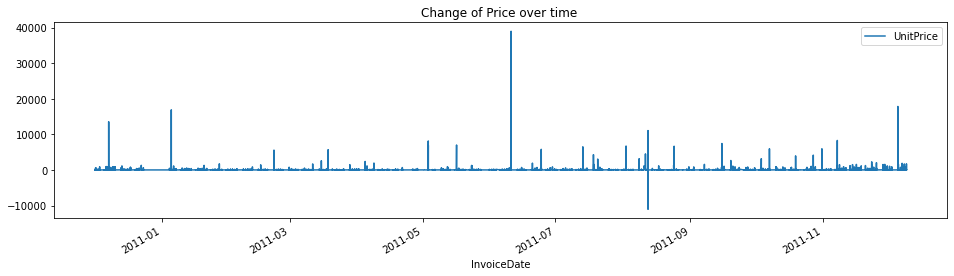

In [28]:
df.plot('InvoiceDate','UnitPrice','line',figsize=(16,4),title="Change of Price over time ")

Let's look how the Quantity varies over time.

<AxesSubplot:title={'center':'Change of Quantity sold over time '}, xlabel='InvoiceDate'>

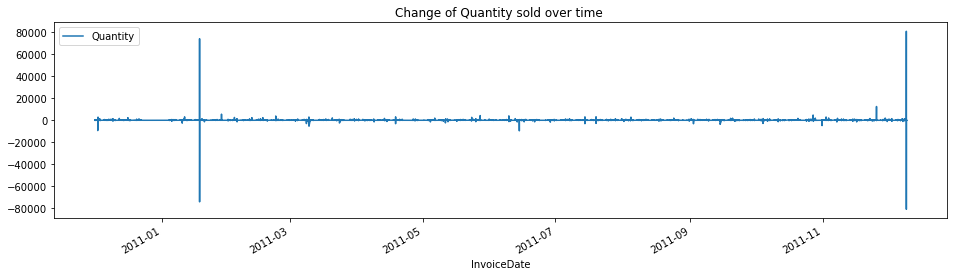

In [29]:
df.plot('InvoiceDate','Quantity','line',figsize=(16,4),title="Change of Quantity sold over time ")

#### l] Plot the skewness - All Numeric Variables

<AxesSubplot:xlabel='CustomerID', ylabel='Density'>

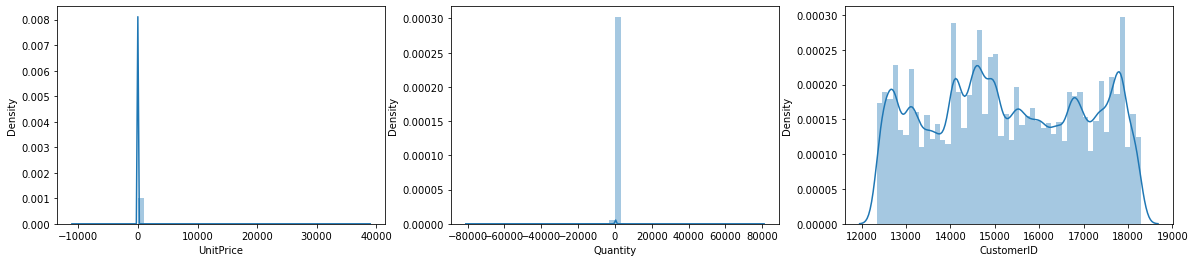

In [30]:
plt.subplots(figsize=(20,4))

plt.subplot(1,3,1)
sns.distplot(df["UnitPrice"])

plt.subplot(1,3,2)
sns.distplot(df["Quantity"])

plt.subplot(1,3,3)
sns.distplot(df["CustomerID"])

Since tha data is not clean enough we can't make many conclusion right now.Let's move ahead and refer these plots when the necessity arises

## 2. Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode)

In [31]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

There are null values in CustomerID and Description columns.We have to impute them with a suitable metric.

<AxesSubplot:xlabel='CustomerID', ylabel='Density'>

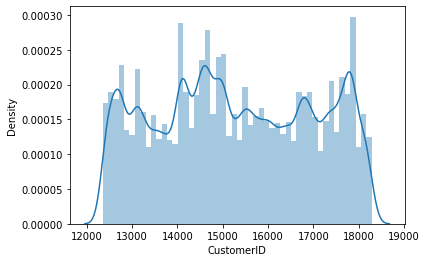

In [32]:
sns.distplot(df["CustomerID"])

As the data distribution is symmetric the appropriate metric is mean .So, we have to replace missing values with mean of the CustomerID.

It's not logical to fill the CustomerID column with mean value.It's better go with forward fill or backward fill.But for now let's not make this complicated and go with mean value to fill the null values.

In [33]:
df['CustomerID']=df["CustomerID"].fillna(df.CustomerID.mean())

In [34]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

There's no proper way we can impute the Description column.

So let's remove all the other records with null values.

In [35]:
df.dropna(inplace=True)

In [36]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## 3. Remove duplicate rows

We have already checked the duplicate values.Now let's remove that.

In [37]:
df[df.duplicated()].count()

InvoiceNo      5268
StockCode      5268
Description    5268
Quantity       5268
InvoiceDate    5268
UnitPrice      5268
CustomerID     5268
Country        5268
dtype: int64

In [38]:
# drop all gthe duplicate values.

df=df.drop_duplicates(keep=False)

In [39]:
df[df.duplicated()].count()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## 4. Remove rows which have negative values in Quantity column

In [40]:
(df["Quantity"]<0).sum()

9693

There are 9693 records with the quantity value less than 0

In [41]:
df.drop(df[df["Quantity"]<0].index,inplace=True)

In [42]:
print("No.of records with Quantity < 0 : ",(df["Quantity"]<0).sum())

No.of records with Quantity < 0 :  0


## 5. Add the columns - Month, Day and Hour for the invoice

In order to analyse the trend of different numerical columns over the given period of time we have to split the date column to Year,Month,Day and Hour

We have already converted the InvoiceDate column to timestamp format in the beginning.

In [43]:
# Let's create new columns year,month,day and hour

df.insert(loc=2, column='Year', value=df['InvoiceDate'].dt.year)
df.insert(loc=3, column='Month', value=df.InvoiceDate.dt.month)

df.insert(loc=4, column='Day', value=(df.InvoiceDate.dt.dayofweek)+1)   # +1 to make Monday=1.....until Sunday=7
df.insert(loc=5, column='Hour', value=df.InvoiceDate.dt.hour)

In [44]:
df.head()

,InvoiceNo,StockCode,Year,Month,Day,Hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,2010,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,2010,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,2010,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,2010,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,2010,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 6. How many orders made by the customers?

In [45]:
no_of_orders = df.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
no_of_orders

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4335,18280.0,10
4336,18281.0,7
4337,18282.0,12
4338,18283.0,688


In [46]:
no_of_orders = no_of_orders.rename(columns={'InvoiceNo':'No.of Orders'})
no_of_orders

,CustomerID,No.of Orders
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4335,18280.0,10
4336,18281.0,7
4337,18282.0,12
4338,18283.0,688


We got the no.of orders made by each customer in the InvoiceNo column in the above table.

Text(0.5, 1.0, 'Number of Orders Per Customers')

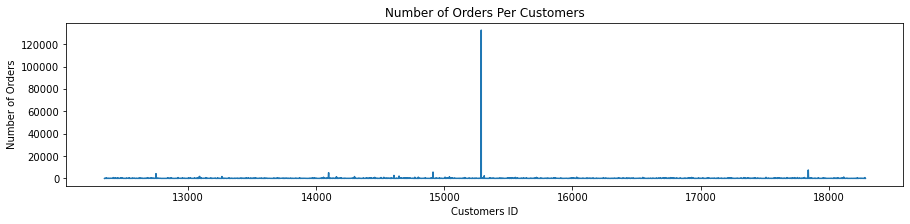

In [47]:

plt.subplots(figsize=(15,3))
plt.plot(no_of_orders.CustomerID, no_of_orders['No.of Orders'])
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders Per Customers')


There is a large spike for a particular customerID.Let's check the CustomerID with Maximum no.of orders

In [48]:
no_of_orders.max()

CustomerID       18287.0
No.of Orders    132692.0
dtype: float64

It can be seen that Customer ID: 18287 had made 132692 order.

## 7. TOP 5 customers with higher number of orders

In [49]:
no_of_orders

,CustomerID,No.of Orders
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4335,18280.0,10
4336,18281.0,7
4337,18282.0,12
4338,18283.0,688


The 'No.of Orders' column in the above table gives the no.of orders made by each customers.Sorting it in descending order and extracting the first 5 values will give us CustomerID with most no.of orders.

In [50]:
no_of_orders['CustomerID'] = no_of_orders['CustomerID'].astype('int64')

In [51]:
no_of_orders.sort_values(by='No.of Orders', ascending=False).head()

,CustomerID,No.of Orders
2161,15287,132692
4012,17841,7523
1880,14911,5667
1290,14096,5111
326,12748,4243


The table above shows the top 5 Customers with most no.of orders

## 8. How much money spent by the customers?

To find the amount of money spent,first we have to calculate the same.

In [52]:
df['Amount_Spent'] = df['Quantity'] * df['UnitPrice']

In [53]:
df.head(2)

,InvoiceNo,StockCode,Year,Month,Day,Hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount_Spent
0,536365,85123A,2010,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,2010,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [54]:
money_spent = df.groupby('CustomerID', as_index=False)['Amount_Spent'].sum()
money_spent

,CustomerID,Amount_Spent
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4335,18280.0,180.60
4336,18281.0,80.82
4337,18282.0,178.05
4338,18283.0,1998.68


The table above gives the amount of money spent by each customers.

Text(0.5, 1.0, 'Money Spent By Customers')

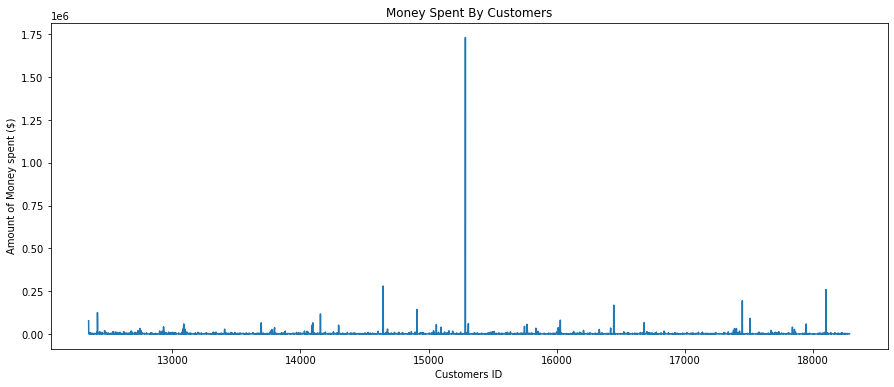

In [55]:

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.Amount_Spent)
plt.xlabel('Customers ID')
plt.ylabel('Amount of Money spent ($)')
plt.title('Money Spent By Customers')


## 9. TOP 5 customers with highest money spent

In [56]:
money_spent.sort_values('Amount_Spent', ascending=False).head()

,CustomerID,Amount_Spent
2161,15287.69057,1.732405e+06
1690,14646.00000,2.802060e+05
4203,18102.00000,2.596573e+05
3730,17450.00000,1.942308e+05
3010,16446.00000,1.684725e+05


This table gives the customers who spent highest amount of money.

## 10. How many orders per month?

In [57]:
orders_per_month = df.groupby('Month',as_index=False)['InvoiceNo'].nunique()

m=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec']
orders_per_month.index=m
orders_per_month = orders_per_month.rename(columns={'InvoiceNo':'Orders Per Month'})

orders_per_month

,Month,Orders Per Month
Jan,1,1089
Feb,2,1101
Mar,3,1459
Apr,4,1255
May,5,1689
Jun,6,1537
July,7,1484
Aug,8,1367
Sep,9,1858
Oct,10,2070


The table above gives the orders generated per each month.

[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'July'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

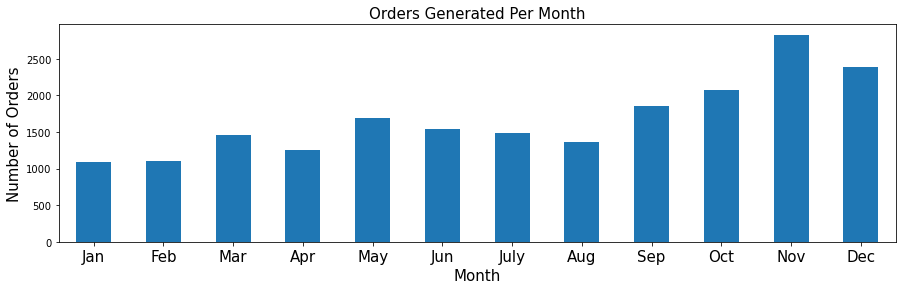

In [58]:
opm = orders_per_month['Orders Per Month'].plot(kind='bar',figsize=(15,4))

opm.set_xlabel('Month',fontsize=15)
opm.set_ylabel('Number of Orders',fontsize=15)
opm.set_title('Orders Generated Per Month',fontsize=15)
opm.set_xticklabels(m, rotation='horizontal', fontsize=15)


The graph shows that most no.of orders are received in the month of November.

## 11. How many orders per day?

In [59]:
orders_per_day = df.groupby('Day',as_index=False)['InvoiceNo'].nunique()

orders_per_day

,Day,InvoiceNo
0,1,3152
1,2,3594
2,3,3728
3,4,4276
4,5,3177
5,7,2207


We can see that there is no orders on day 6. So let's assume that day as a holiday ie,we are going to consider Staurday as holiday.

In [60]:
d=['Mon','Tue','Wed','Thu','Fri','Sun']

orders_per_day.index=d
orders_per_day = orders_per_day.rename(columns={'InvoiceNo':'Orders Per day'})
orders_per_day

,Day,Orders Per day
Mon,1,3152
Tue,2,3594
Wed,3,3728
Thu,4,4276
Fri,5,3177
Sun,7,2207


The table above shows the number of orders made everyday.

[Text(0, 0, 'Mon'),
 Text(1, 0, 'Tue'),
 Text(2, 0, 'Wed'),
 Text(3, 0, 'Thu'),
 Text(4, 0, 'Fri'),
 Text(5, 0, 'Sun')]

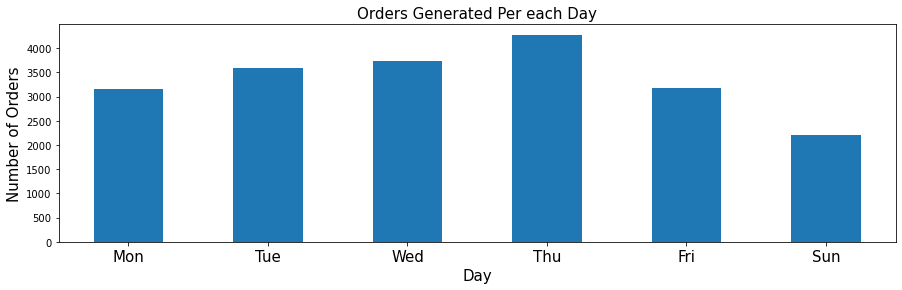

In [61]:
opd = orders_per_day['Orders Per day'].plot(kind='bar',figsize=(15,4))

opd.set_xlabel('Day',fontsize=15)
opd.set_ylabel('Number of Orders',fontsize=15)
opd.set_title('Orders Generated Per each Day',fontsize=15)
opd.set_xticklabels(d, rotation='horizontal', fontsize=15)


It is clear from the graph that the orders generated is less for sunday and maximum for Thursday.

## 12. How many orders per hour?

In [62]:
orders_per_hour=df.groupby('Hour',as_index=False)['InvoiceNo'].nunique()
orders_per_hour

,Hour,InvoiceNo
0,6,1
1,7,29
2,8,567
3,9,1501
4,10,2377
5,11,2425
6,12,3242
7,13,2774
8,14,2473
9,15,2362


In [63]:
h=['6:00AM','7:00AM','8:00AM','9:00AM','10:00AM','11:00AM','12:00PM','01:00PM','02:00PM','03:00PM','04:00PM','05:00PM','06:00PM','07:00PM','08:00PM']

orders_per_hour.index=h
orders_per_hour = orders_per_hour.rename(columns={'InvoiceNo':'Orders Per Hour'})
orders_per_hour

,Hour,Orders Per Hour
6:00AM,6,1
7:00AM,7,29
8:00AM,8,567
9:00AM,9,1501
10:00AM,10,2377
11:00AM,11,2425
12:00PM,12,3242
01:00PM,13,2774
02:00PM,14,2473
03:00PM,15,2362


Orders generated per every working hour is available in the above table.

[Text(0, 0, '6:00AM'),
 Text(1, 0, '7:00AM'),
 Text(2, 0, '8:00AM'),
 Text(3, 0, '9:00AM'),
 Text(4, 0, '10:00AM'),
 Text(5, 0, '11:00AM'),
 Text(6, 0, '12:00PM'),
 Text(7, 0, '01:00PM'),
 Text(8, 0, '02:00PM'),
 Text(9, 0, '03:00PM'),
 Text(10, 0, '04:00PM'),
 Text(11, 0, '05:00PM'),
 Text(12, 0, '06:00PM'),
 Text(13, 0, '07:00PM'),
 Text(14, 0, '08:00PM')]

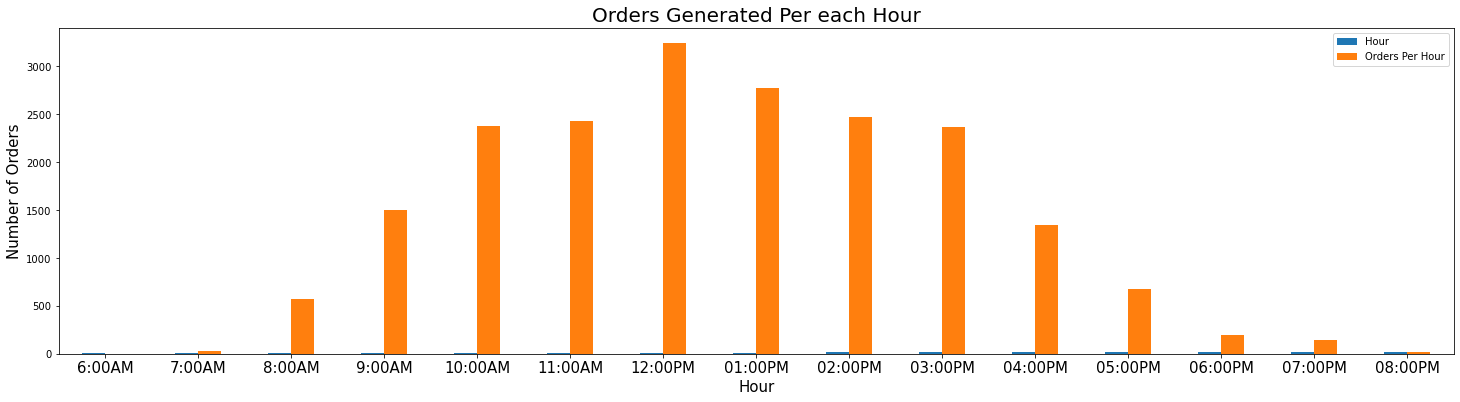

In [64]:
oph = orders_per_hour.plot(kind='bar',figsize=(25,6))

oph.set_xlabel('Hour',fontsize=15)
oph.set_ylabel('Number of Orders',fontsize=15)
oph.set_title('Orders Generated Per each Hour',fontsize=20)
oph.set_xticklabels(h, rotation='horizontal', fontsize=15)

The maximum number of orders are generated in the noon time.That means the peak sales occurs during the time period 10:00AM to 4:00PM

###  13. How many orders for each country?

In [65]:
orders_per_country=df.groupby('Country',as_index=False)['InvoiceNo'].nunique().sort_values('InvoiceNo',ascending=False)
orders_per_country

,Country,InvoiceNo
36,United Kingdom,18192
14,Germany,457
13,France,392
10,EIRE,288
3,Belgium,98
24,Netherlands,95
31,Spain,90
27,Portugal,58
0,Australia,57
33,Switzerland,54


In [66]:

orders_per_country = orders_per_country.rename(columns={'InvoiceNo':'Orders Per Country'})
orders_per_country

,Country,Orders Per Country
36,United Kingdom,18192
14,Germany,457
13,France,392
10,EIRE,288
3,Belgium,98
24,Netherlands,95
31,Spain,90
27,Portugal,58
0,Australia,57
33,Switzerland,54


The above table shows the orders received from different countries.

We can see that most no.of orders are from UK itself since it is a UK based store.So lets check how orders from other countries are distributed.

In [67]:
# drop the UK data from above table.

orders_per_country = orders_per_country.drop(labels=36)

[Text(0, 0, 'Germany'),
 Text(1, 0, 'France'),
 Text(2, 0, 'EIRE'),
 Text(3, 0, 'Belgium'),
 Text(4, 0, 'Netherlands'),
 Text(5, 0, 'Spain'),
 Text(6, 0, 'Portugal'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Switzerland'),
 Text(9, 0, 'Finland'),
 Text(10, 0, 'Italy'),
 Text(11, 0, 'Norway'),
 Text(12, 0, 'Sweden'),
 Text(13, 0, 'Channel Islands'),
 Text(14, 0, 'Japan'),
 Text(15, 0, 'Poland'),
 Text(16, 0, 'Denmark'),
 Text(17, 0, 'Austria'),
 Text(18, 0, 'Cyprus'),
 Text(19, 0, 'Unspecified'),
 Text(20, 0, 'Hong Kong'),
 Text(21, 0, 'Israel'),
 Text(22, 0, 'Iceland'),
 Text(23, 0, 'Singapore'),
 Text(24, 0, 'Canada'),
 Text(25, 0, 'USA'),
 Text(26, 0, 'Malta'),
 Text(27, 0, 'Greece'),
 Text(28, 0, 'European Community'),
 Text(29, 0, 'Lithuania'),
 Text(30, 0, 'Bahrain'),
 Text(31, 0, 'United Arab Emirates'),
 Text(32, 0, 'Czech Republic'),
 Text(33, 0, 'Lebanon'),
 Text(34, 0, 'Brazil'),
 Text(35, 0, 'RSA'),
 Text(36, 0, 'Saudi Arabia')]

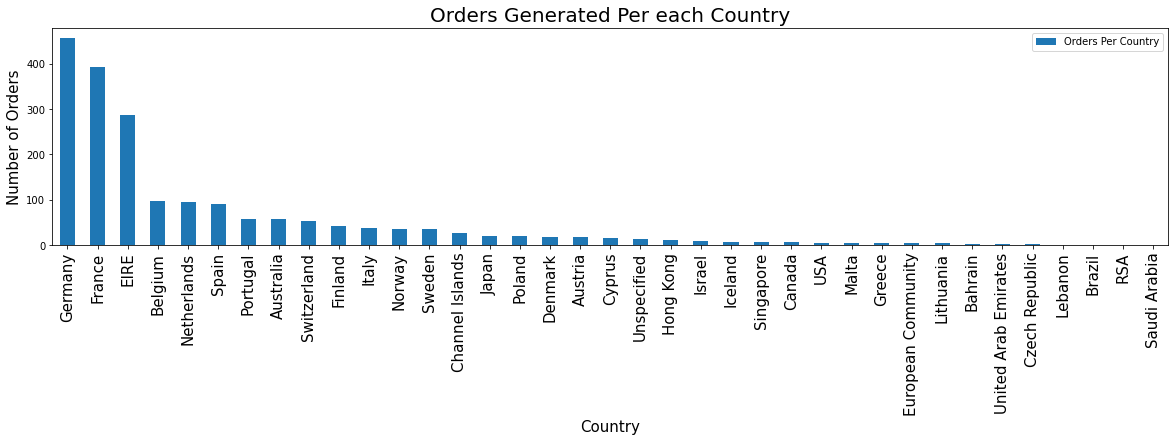

In [68]:
opc = orders_per_country.plot(kind='bar',figsize=(20,4))

opc.set_xlabel('Country',fontsize=15)
opc.set_ylabel('Number of Orders',fontsize=15)
opc.set_title('Orders Generated Per each Country',fontsize=20)
opc.set_xticklabels(orders_per_country['Country'].unique(),rotation='vertical', fontsize=15)

Apart from UK , the most no.of orders are got from Germany,France and EIRE

## 14. Orders trend across months 


We ahve already generated a table for orders_per_month.   Let's make use of that here to plot the trend line

Text(0.5, 1.0, 'Trend Of Orders Across Months')

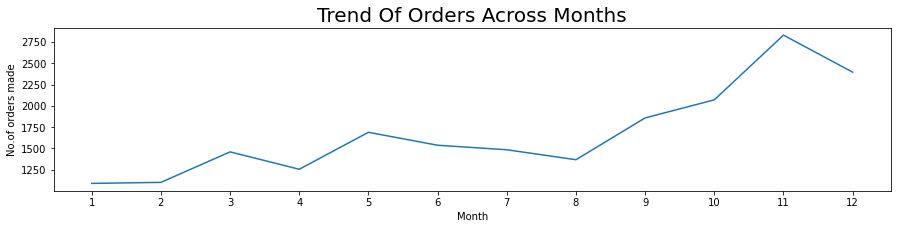

In [69]:

plt.subplots(figsize=(15,3))
plt.plot(orders_per_month.Month, orders_per_month['Orders Per Month'])
plt.xlabel('Month')
plt.xticks(range(1,13,1))
plt.ylabel('No.of orders made')
plt.title('Trend Of Orders Across Months',fontsize=20)


There is an uptrend in the orders received along the months.The no.of orders received goes on increasing from jan to Nov.There is a slight decrease in orders received in the Month of Dec.

## 15. How much money spent by each country?

We have already made a column 'Amount_Spent'] showing the money spent.Let's make use of that and find out how much money is spent by each countries.

In [70]:
money_spent_by_countries = df.groupby('Country', as_index=False)['Amount_Spent'].sum().sort_values('Amount_Spent',ascending=False)
money_spent_by_countries

,Country,Amount_Spent
36,United Kingdom,8.957894e+06
24,Netherlands,2.854463e+05
10,EIRE,2.828271e+05
14,Germany,2.284897e+05
13,France,2.095356e+05
0,Australia,1.383863e+05
31,Spain,6.154001e+04
33,Switzerland,5.704530e+04
3,Belgium,4.119634e+04
32,Sweden,3.835733e+04


Now we got the amount of money spent by all the countries.

[Text(0, 0, 'United Kingdom'),
 Text(0, 1, 'Netherlands'),
 Text(0, 2, 'EIRE'),
 Text(0, 3, 'Germany'),
 Text(0, 4, 'France'),
 Text(0, 5, 'Australia'),
 Text(0, 6, 'Spain'),
 Text(0, 7, 'Switzerland'),
 Text(0, 8, 'Belgium'),
 Text(0, 9, 'Sweden'),
 Text(0, 10, 'Japan'),
 Text(0, 11, 'Norway'),
 Text(0, 12, 'Portugal'),
 Text(0, 13, 'Finland'),
 Text(0, 14, 'Singapore'),
 Text(0, 15, 'Channel Islands'),
 Text(0, 16, 'Denmark'),
 Text(0, 17, 'Italy'),
 Text(0, 18, 'Hong Kong'),
 Text(0, 19, 'Cyprus'),
 Text(0, 20, 'Austria'),
 Text(0, 21, 'Israel'),
 Text(0, 22, 'Poland'),
 Text(0, 23, 'Greece'),
 Text(0, 24, 'Unspecified'),
 Text(0, 25, 'Iceland'),
 Text(0, 26, 'Canada'),
 Text(0, 27, 'USA'),
 Text(0, 28, 'Malta'),
 Text(0, 29, 'United Arab Emirates'),
 Text(0, 30, 'Lebanon'),
 Text(0, 31, 'Lithuania'),
 Text(0, 32, 'European Community'),
 Text(0, 33, 'Brazil'),
 Text(0, 34, 'RSA'),
 Text(0, 35, 'Czech Republic'),
 Text(0, 36, 'Bahrain'),
 Text(0, 37, 'Saudi Arabia')]

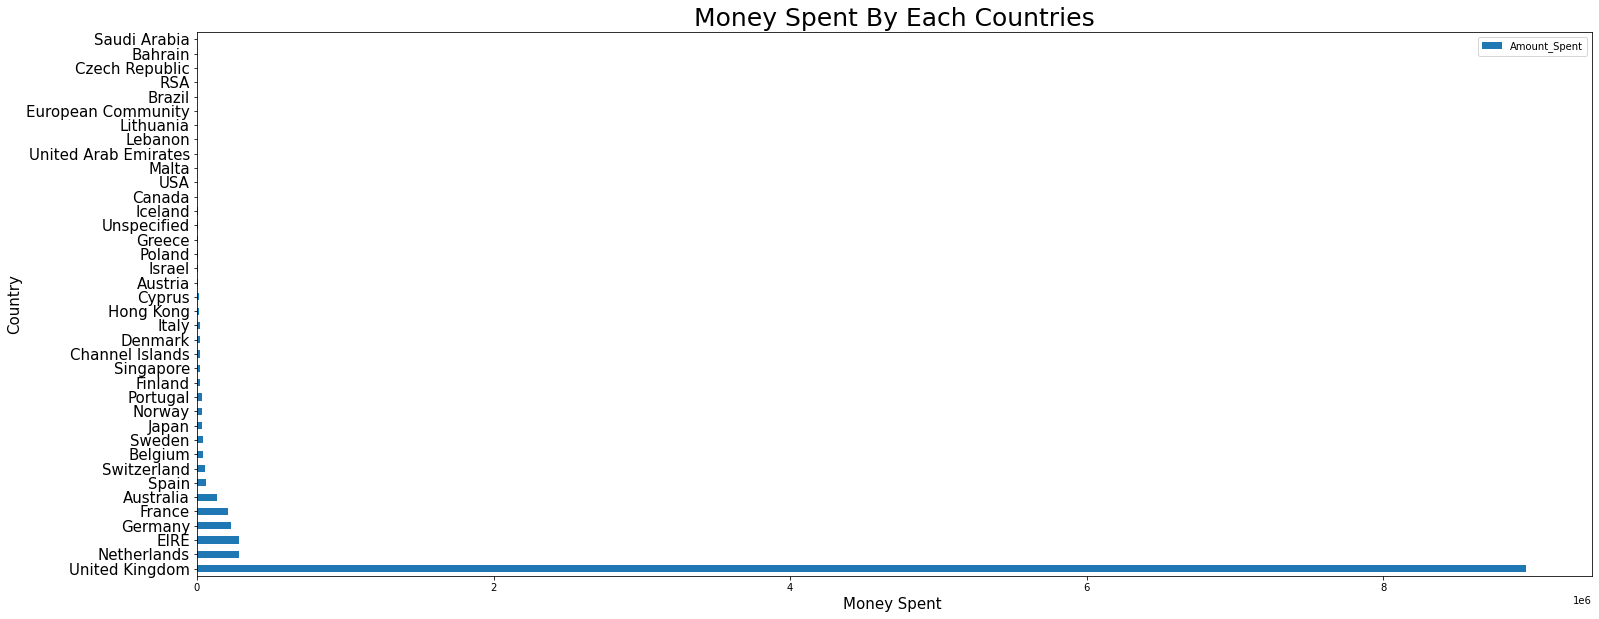

In [71]:
msc = money_spent_by_countries.plot(kind='barh',figsize=(25,10))

msc.set_xlabel('Money Spent ',fontsize=15)
msc.set_ylabel('Country',fontsize=15)
msc.set_title('Money Spent By Each Countries',fontsize=25)
msc.set_yticklabels(money_spent_by_countries.Country, rotation='horizontal', fontsize=15)

It is obvious that most no.of orders are from UK so the amount_spent will also be more there.

Let's check amount spent by all other countries except United Kingdom.

In [72]:
money_spent_by_countries = money_spent_by_countries.drop(labels=36)

[Text(0, 0, 'Netherlands'),
 Text(0, 1, 'EIRE'),
 Text(0, 2, 'Germany'),
 Text(0, 3, 'France'),
 Text(0, 4, 'Australia'),
 Text(0, 5, 'Spain'),
 Text(0, 6, 'Switzerland'),
 Text(0, 7, 'Belgium'),
 Text(0, 8, 'Sweden'),
 Text(0, 9, 'Japan'),
 Text(0, 10, 'Norway'),
 Text(0, 11, 'Portugal'),
 Text(0, 12, 'Finland'),
 Text(0, 13, 'Singapore'),
 Text(0, 14, 'Channel Islands'),
 Text(0, 15, 'Denmark'),
 Text(0, 16, 'Italy'),
 Text(0, 17, 'Hong Kong'),
 Text(0, 18, 'Cyprus'),
 Text(0, 19, 'Austria'),
 Text(0, 20, 'Israel'),
 Text(0, 21, 'Poland'),
 Text(0, 22, 'Greece'),
 Text(0, 23, 'Unspecified'),
 Text(0, 24, 'Iceland'),
 Text(0, 25, 'Canada'),
 Text(0, 26, 'USA'),
 Text(0, 27, 'Malta'),
 Text(0, 28, 'United Arab Emirates'),
 Text(0, 29, 'Lebanon'),
 Text(0, 30, 'Lithuania'),
 Text(0, 31, 'European Community'),
 Text(0, 32, 'Brazil'),
 Text(0, 33, 'RSA'),
 Text(0, 34, 'Czech Republic'),
 Text(0, 35, 'Bahrain'),
 Text(0, 36, 'Saudi Arabia')]

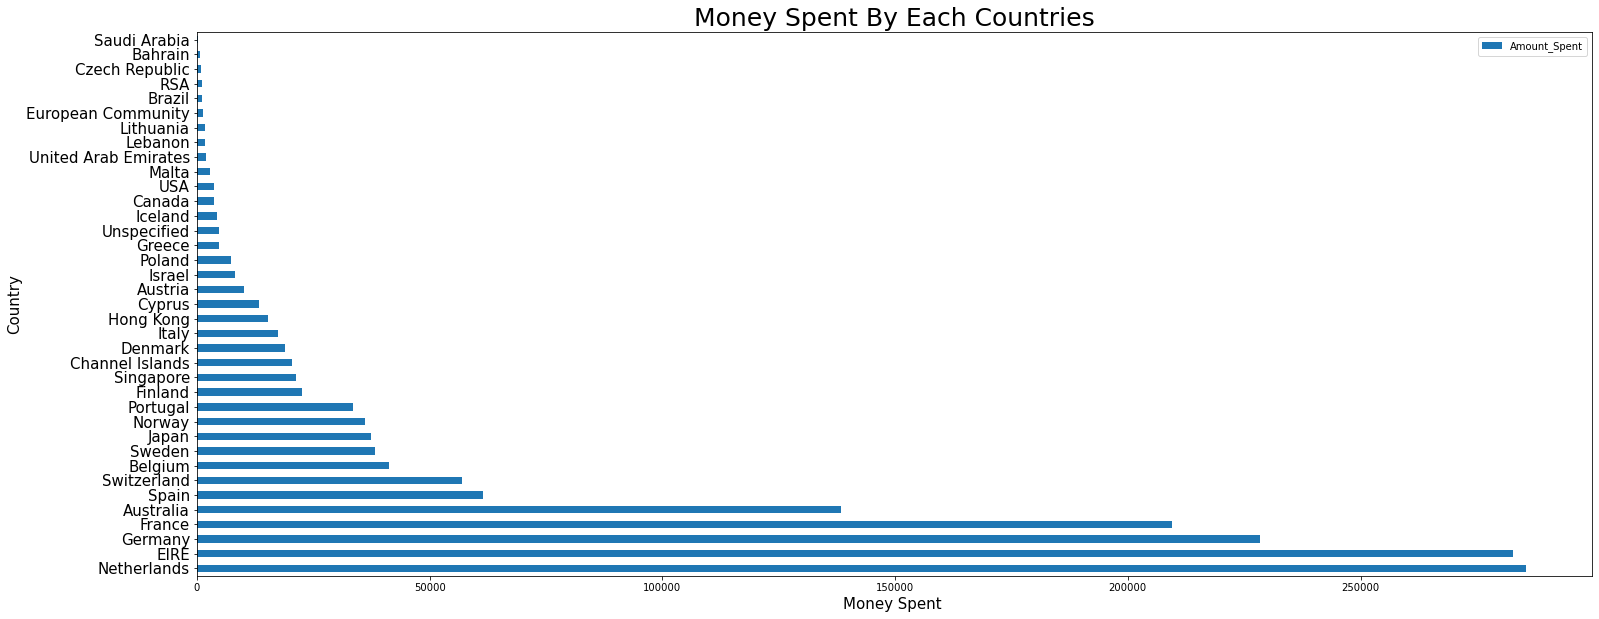

In [73]:
msc = money_spent_by_countries.plot(kind='barh',figsize=(25,10))

msc.set_xlabel('Money Spent ',fontsize=15)
msc.set_ylabel('Country',fontsize=15)
msc.set_title('Money Spent By Each Countries',fontsize=25)
msc.set_yticklabels(money_spent_by_countries.Country, rotation='horizontal', fontsize=15)

Apart from UK, Netherland,EIRE,Germany,France and Australia are the countries that contributes most to the revenue of our company.

$  A $ $brief$  $analysis$  $by$  $Alwin Mathew  $